In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [9]:

data = pd.read_csv (r'C:\Users\Maximus\manastaskphase_aaron1\data\heartdisease.csv')
data.dropna(inplace=True) #dropping na values


[[  1.  39.   0. ...  77.   0.   1.]
 [  0.  46.   0. ...  76.   0.   1.]
 [  1.  48.   1. ...  70.   0.   1.]
 ...
 [  1.  50.   1. ...  86.   1.   1.]
 [  1.  51.   1. ...  68.   0.   1.]
 [  0.  52.   0. ... 107.   0.   1.]]


In [17]:
data

male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0        1   39              0         0.0     0.0                0   
1        0   46              0         0.0     0.0                0   
2        1   48              1        20.0     0.0                0   
3        0   61              1        30.0     0.0                0   
4        0   46              1        23.0     0.0                0   
...    ...  ...            ...         ...     ...              ...   
4231     1   58              0         0.0     0.0                0   
4232     1   68              0         0.0     0.0                0   
4233     1   50              1         1.0     0.0                0   
4234     1   51              1        43.0     0.0                0   
4237     0   52              0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    195.0  106.0   70.0  26.97       80.0   
1                0         0    250.0  121.0   81.0  28.73       95.0   
2                0         0    245.0  127.5   80.0  25.34       75.0   
3                1         0    225.0  150.0   95.0  28.58       65.0   
4                0         0    285.0  130.0   84.0  23.10       85.0   
...            ...       ...      ...    ...    ...    ...        ...   
4231             1         0    187.0  141.0   81.0  24.96       80.0   
4232             1         0    176.0  168.0   97.0  23.14       60.0   
4233             1         0    313.0  179.0   92.0  25.97       66.0   
4234             0         0    207.0  126.5   80.0  19.71       65.0   
4237             0         0    269.0  133.5   83.0  21.47       80.0   

      glucose  TenYearCHD  new  
0        77.0           0  1.0  
1        76.0           0  1.0  
2        70.0           0  1.0  
3       103.0           1  1.0  
4        85.0           0  1.0  
...       ...         ...  ...  
4231     81.0           0  1.0  
4232     79.0           1  1.0  
4233     86.0           1  1.0  
4234     68.0           0  1.0  
4237    107.0           0  1.0  

[3656 rows x 16 columns]

In [ ]:
data.drop(['education'], axis=1, inplace=True) #removing education as the feature  poses little significance to heart disease prediction
m=data['male'].count() #deriving the number of training cases
l=[1.0]*m
data['new']=l # adding X0=1 column
X=data.to_numpy()
X=X.astype(np.float64)
print(X)
y=X[:,14] #extracting the heartdisease value y(=0/1)
m=len(y)
X=np.delete(X, 14, 1)
thet=np.array([[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[1]])
Xsc=X.copy()
minx=np.min(X[:,1:])
maxx=np.max(X[:,1:])
Xsc[:,1:]=(X[:,1:]-minx)/(maxx-minx)
ysc=y.copy()
ysc=ysc.reshape(-1,1)

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def grad(error):
    pd = (np.dot(Xsc.T, error))/m
    return pd
def cost(h):
    return (1/m)*np.sum(y * (-1 * np.log(h)) +(1 - y) * (-1 * np.log(1 - h)))

In [11]:
def regression(theta0,learning_rate=1,epochs=150):
    print(f'epoch \t Cost(J) \t')
    for epoch in range(epochs):
        epoch_history.append(epoch)
        ypr=Xsc.dot(theta0)
        h=sigmoid(ypr).reshape(-1,1)
        error=h-ysc
        dJ=grad(error)
        J=cost(h)
        theta0=theta0-learning_rate*dJ
        J_history.append(J)
        if epoch%10==0:
            print(f'{epoch:5d}\t{J_history[-1]:7.4f}\t')
    return theta0

In [12]:
J_history = []
epoch_history=[]

In [13]:
newtheta=regression(thet)
ypr=Xsc.dot(newtheta)
h=sigmoid(ypr).reshape(-1,1)
i=0
for x in h:
    if x>=0.5:
        ypr[i]=1
    elif x<0.5:
        ypr[i]=0
    i=i+1
i=0
right=0
for i in range(m):
    if ypr[i]==ysc[i]:
        right=right+1
acc=(right/m)*100



epoch 	 Cost(J) 	
    0	5705.2038	
   10	2169.9403	
   20	1805.5086	
   30	1699.1989	
   40	1649.7922	
   50	1622.3706	
   60	1606.0097	
   70	1595.9448	
   80	1589.6821	
   90	1585.7929	
  100	1583.4166	
  110	1582.0174	
  120	1581.2527	
  130	1580.8993	
  140	1580.8096	
accuracy 84.76477024070022


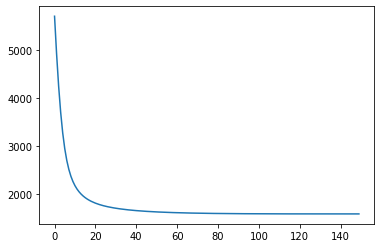

In [14]:
plt.plot(epoch_history,J_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

In [18]:
print("Accuracy:",acc)

Accuracy: 84.76477024070022
